In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
yeomi_review = db['yeomi_review']
yeomi_review = yeomi_review.find()
yeomi_review = pd.DataFrame(yeomi_review)
kto9suk9suk_review = db['kto9suk9suk_review']
kto9suk9suk_review = kto9suk9suk_review.find()
kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

# 데이터 전처리

## 여행에 미치다 페이지에서 국내 여행 게시글만 가져오기

In [4]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
201,65f9bf4f08bfcc46ca193606,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,NaN,NaN
202,65f9bf4f08bfcc46ca193607,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@shorokhofff,2018년 6월 22일
203,65f9bf4f08bfcc46ca193608,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@soye0114 여기 다니엘 뮤비 찍은곳인가???!!!,2018년 2월 24일
204,65f9bf5008bfcc46ca193609,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@h.a.ing 요기봐 ㅋㅋㅋㅋㅋㅋ,2018년 2월 8일
205,65f9bf5008bfcc46ca19360a,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@dal.hye 야 나 여기 가고싶어ㅠㅠㅠ,2018년 1월 28일
...,...,...,...,...,...,...,...,...
1152424,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
1152425,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
1152426,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
1152427,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 구석구석 페이지와 여행에 미치다 페이지에서 가져온 데이터 합치기

In [5]:
kto9suk9suk_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [6]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
599153,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 어느 지역에 관한 표시

In [7]:
region_gw = ['강원도 ','강원 ','강원특별자치도 ','#강원','#강릉', '#고성', '#동해', '#삼척', '#속초', '#양구', '#양양', '#영월', '#원주', '#인제', '#정선', '#철원', '#춘천', '#태백', '#평창', '#홍천', '#화천', '#횡성']
region_gg = ['경기도 ','경기 ','#경기','#가평', '#고양', '#과천', '#광명', '#구리', '#군포', '#김포', '#남양주', '#동두천', '#부천', '#성남', '#수원', '#시흥', '#안산', '#안성', '#안양', '#양주', '#양평', '#여주', '#연천', '#오산', '#용인', '#의왕', '#의정부', '#이천', '#파주', '#평택', '#포천', '#하남', '#화성']
region_gn = ['경상남도 ','경남 ','#경남 ','#거제', '#거창', '#고성', '#김해', '#남해', '#밀양', '#사천', '#산청', '#양산', '#의령', '#진주', '#창녕', '#창원', '통영', '#하동', '#함안', '#함양', '#합천']
region_gb = ['경상북도 ','경북 ','#경북','#경산', '#경주', '#고령', '#구미', '#김천', '#문경', '#봉화', '#상주', '#성주', '#안동', '#영덕', '#영양', '#영주', '#영천', '#예천', '#울릉', '#울진', '#의성', '#청도', '#청송', '#칠곡', '#포항']
region_gj = ['광주광역시 ','광주 ','#광주','#광산']
region_dg = ['대구광역시 ','대구 ','#대구','#군위', '#달서', '#달성', '#수성']
region_dj = ['대전광역시 ','대전 ','#대전','#대덕',   '#유성']
region_sj = ['세종특별자치시 ','세종 ','#세종']
region_bs = ['부산특별시 ','부산 ','#부산', '#금정', '#기장',  '#동래', '#부산진', '#사상', '#사하',  '#수영', '#연제', '#영도',  '#해운대']
region_su = ['서울특별시 ','서울 ','#서울','#강남', '#강동', '#강북', '#관악', '#광진', '#구로', '#금천', '#노원', '#도봉', '#동대문', '#동작', '#마포', '#서대문', '#서초', '#성동', '#성북', '#송파', '#양천', '#영등포', '#용산', '#은평', '#종로',  '#중랑']
region_us = ['울산광역시 ', '울산 ','#울산', '#울주']
region_ic = ['인천광역시 ','인천 ','#인천','#강화', '#계양', '#남동',  '#미추홀', '#부평',  '#연수', '#옹진']
region_jn = ['전라남도 ','전남 ','#강진', '#전남','#고흥', '#곡성', '#광양', '#구례', '#나주', '#담양', '#목포', '#무안', '#보성', '#순천', '#신안', '#여수', '#영광', '#영암', '#완도', '#장성', '#장흥', '#진도', '#함평', '#해남', '#화순']
region_jb = ['전라북도 ','전북 ','#고창', '#전북','#군산', '#김제', '#남원', '#무주', '#부안', '#순창', '#완주', '#익산', '#임실', '#장수', '#전주', '#정읍', '#진안']
region_jj = ['제주특별자치도 ','제주 ','#서귀포', '#제주']
region_cn = ['충청남도 ','충남 ','#충남','#계룡', '#공주', '#금산', '#논산', '#당진', '#보령', '#부여', '#서산', '#서천', '#아산', '#예산', '#천안', '#청양', '#태안', '#홍성']
region_cb = ['충청북도 ','충북 ','#충북','#괴산', '#단양', '#보은', '#영동', '#옥천', '#음성', '#제천', '#증평', '#진천', '#청주', '#충주']

In [8]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('강원')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('경기')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('경남')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('광주')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('경북')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('세종')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('대구')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('대전')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('부산')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('서울')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('울산')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('인천')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('전남')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('전북')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('제주')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('충남')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('충북')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## 댓글에 관한 데이터와 제목에 관한 데이터 분류

In [9]:
df_sns_review = df_sns[df_sns['review_content'].notna()]
df_sns_title = df_sns[df_sns['review_content'].isna()]
df_sns_review = df_sns_review.reset_index()
df_sns_review
df_sns_title = df_sns_title.reset_index()
df_sns_title


,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
0,0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN,,
1,3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN,부산,부산
2,4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN,제주,#제주
3,7,65f99f8d08bfcc46ca193524,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,NaN,NaN,울산,"울산 , #울산"
4,11,65f99f8f08bfcc46ca193528,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된...,2014년 7월 12일,39,,qVtXCrTTIY,NaN,NaN,광주,"광주 , #광주"
...,...,...,...,...,...,...,...,...,...,...,...
5187,599013,662abcaaf231019cd5b60515,"드디어 다음주, 국가권력급 벚꽃맛집 ‘여의도’ 봄꽃축제 개막 (뿌뿌-)\n\n누가 ...",2024년 3월 23일,3091,,C41qMeoBkpF,NaN,NaN,서울,"서울 , #서울"
5188,599038,662abe16f231019cd5b60b80,지금 제일 핫하다는 기안84 전시 ‘기안도(奇案島)’ 후기 🔥\n다들 여기서 기안8...,2024년 3월 26일,4752,,C49-AnfBEhj,NaN,NaN,서울,"서울 , #서울"
5189,599137,662ada15f231019cd5b61622,"지친 일상으로부터 벗어날 수 있는 시간, 응봉산에서 🌙\n\n이번 한주도 수고한 여...",2024년 4월 19일,1530,,C58BRwIhdW4,NaN,NaN,서울,"서울 , #서울"
5190,599140,662af284f231019cd5b61861,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,NaN,NaN,경남,#거창


In [10]:
pivot_review = pd.pivot_table(df_sns_review,index=['region','card_content','card_date','card_like','card_watch'],values='_id',aggfunc='count')
df_sns_title = pivot_review.reset_index()

In [11]:
len(df_sns_title)

4652

In [12]:
def split(text):
    text = text.replace("#", " ")
    text = text.replace("취미찾기 프로젝트", " ")
    text = text.replace("밥상의 여정", " ")
    text = text.replace("팔도장터관광열차", " ")
    return text

In [13]:
df_sns_title.loc[:,'card_content'] = df_sns_title['card_content'].apply(split)

## 계절별로 분류

In [14]:
for i in range(len(df_sns_title)):
    df_sns_title.loc[i,'card_month'] = df_sns_title.loc[i,'card_date'].split()[1][:-1]
    if df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['3','4','5']:
        df_sns_title.loc[i,'card_season'] = '봄'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['6','7','8']:
        df_sns_title.loc[i,'card_season']  = '여름'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['9','10','11']:
        df_sns_title.loc[i,'card_season']  = '가을'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['12','1','2']:
        df_sns_title.loc[i,'card_season'] = '겨울'


In [15]:
df_sns_title['card_season'].value_counts()

card_season
여름    1280
가을    1178
봄     1130
겨울    1064
Name: count, dtype: int64

In [16]:
df_sns_title['card_month'].value_counts()

card_month
8     487
7     413
10    397
11    396
3     395
9     385
6     380
1     375
12    373
5     373
4     362
2     316
Name: count, dtype: int64

## 키워드 분류

In [17]:
# 토크나이징 함수 정의
flower_list = ['부용','목향','마호가니','메타세콰이어','아카시아','단풍나무','은행나무','낙엽','꽃무릇','수레국화','참꽃','단풍','들꽃','마지기','꽃잔디','봄꽃','해바라기','수선화','목련','벚꽃','장미','라벤더','무궁화','황화','코스모스','국화','댑싸리','맨드라미','유채꽃','튤립','진달래','수국','배롱나무','매화','철쭉','산수유','유채','은행','팜파스','데이지','개나리','맥문동']
stopwords =['휴가','취미','펭수','간정','아워플래닛','케이스','화개면', '합천군','이모','강화군','연천군','인권','고창군','광역시','무주군','나주','입국','개항','검사','머리','배경화면','청양군','대통령','역대','여권','합격자','정부','청사','발표','상환','금융','재단','계약','새해','연말','하락','수상작','말티재','신용카드','원리금','엽서','헬기','스마트','겨울왕국','소통','하늘정원','난산','보롬왓','청산도','가파도','사승봉도','백제','관광','디지털','평점','거래','카드','평화','백호','수칙','확산','대국민','금요일','가사','마음','심쿵','제발','혼인','발생','시점','내용','내외','상황','사전','미션','신용','대출','두기','거리','지역','발대식','취재','기사','사회','연체','약정', '금리','할부','단계','농협카드','일부','자단','격상','로컬힙','여행지','추천','풍경','마을','국내','여행','스타','그램','구석구석','가을','겨울','여름','봄','사진','위치','모두','일상','방역','준수','트래블','리더','시작','제공']
list_region = ['울릉군','영양군','암산','장림','함안군','달성군','옥천군','담양군','산청군','예천군','영월군','양양군','하동군','창녕군','보성군','해남군','강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북','강릉','고성','동해','삼척','속초','양구','양양','영월','원주','인제','정선','철원','춘천','태백','평창','홍천','화천','횡성','가평','고양','과천','광명','광주','구리','군포','김포','남양주','동두천','부천','성남','수원','시흥','안산','안성','안양','양주','양평','여주','연천','오산','용인','의왕','의정부','이천','파주','평택','포천','하남','화성','거제','거창','고성','김해','남해','밀양','사천','산청','양산','의령','진주','창녕','창원','통영','하동','함안','함양','합천','경산','경주','고령','구미','김천','문경','봉화','상주','성주','안동','영덕','영양','영주','영천','예천','울릉','울진','의성','청도','청송','칠곡','포항','광산','남구','동구','북구','서구','군위','남구','달서','달성','동구','북구','서구','수성','중구','대덕','동구','서구','유성','중구','강서','금정','기장','남구','동구','동래','부산진','북구','사상','사하','서구','수영','연제','영도','중구','해운대','강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문','서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑','남구','동구','북구','울주','중구','강화','계양','남동','동구','미추홀','부평','서구','연수','옹진','중구','강진','고흥','곡성','광양','구례','나주시','담양','목포','무안','보성','순천','신안','여수','영광','영암','완도','장성','장흥','진도','함평','해남','화순','고창','군산','김제','남원','무주','부안','순창','완주','익산','임실','장수','전주','정읍','진안','서귀포','제주','계룡','공주','금산','논산','당진','보령','부여','서산','서천','아산','예산','천안','청양','태안','홍성','괴산','단양','보은','영동','옥천','음성','제천','증평','진천','청주','충주']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "꽃"
                if word =='왕리':
                    word = "을왕리"
                if word =='판악':
                    word = "성판악"
                if word =='차밭':
                    word = "녹차밭"
                if word =='서풍':
                    word = "서풍받이"
                if word =='캡슐':
                    word = "캡슐열차"
                if word =='비봉':
                    word = "비봉산"
                if word =='트럴':
                    word = "센트럴"
                if word =='장대':
                    word = "금장대"
                if word =='하늬':
                    word = "하늬팜"
                word_list.append(word)
    return " ".join(word_list)

In [18]:
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content'].apply(Tokenizer)

In [19]:
def replace(text):
    text = text.replace("팔도 장터", "팔도장터")
    text = text.replace("취미 프로젝트", "")
    text = text.replace("취미프로젝트", "")
    text = text.replace("선성 수상", "선성수상길")
    text = text.replace("삼강 주막", "삼강주막")
    text = text.replace("차콜 마스크", "")
    return text
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content_clean'].apply(replace)

In [20]:
def flower(text):
    if "꽃" in text:    
        return 1
df_sns_title.loc[:,'flower_check']=df_sns_title['card_content_clean'].apply(flower)

In [21]:
def festival(text):
    if "축제" in text:    
        return 1
df_sns_title.loc[:,'festival_check']=df_sns_title['card_content_clean'].apply(festival)

## 계절별로 키워드 분류

In [22]:
df_sns_title[df_sns_title['card_content'].str.contains('펭수')]['card_content']
# df_sns_title.loc[2477,'card_content']

2447    펭-하! 여러분! 펭수가 백신을 맞고 광안리로 돌아왔답니다🐧\n\n귀여움으로  부산...
2476    🐧\n[광안리 바다 위에 펭수가 떴다!]\n\n여름기간 동안 광안리 마스코트가 된 ...
Name: card_content, dtype: object

In [23]:
df_sns_title_spring = df_sns_title.query("card_season=='봄'")
df_sns_title_summer = df_sns_title.query("card_season=='여름'")
df_sns_title_fall = df_sns_title.query("card_season=='가을'")
df_sns_title_winter = df_sns_title.query("card_season=='겨울'")
spring_text = " ".join(list(df_sns_title_spring.loc[:,'card_content_clean']))
summer_text = " ".join(list(df_sns_title_summer.loc[:,'card_content_clean']))
fall_text = " ".join(list(df_sns_title_fall.loc[:,'card_content_clean']))
winter_text = " ".join(list(df_sns_title_winter.loc[:,'card_content_clean']))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([spring_text,summer_text,fall_text,winter_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
season = ['봄','여름','가을','겨울']
season_list = []
for i, sentence in enumerate([spring_text, summer_text, fall_text, winter_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    season_list.append(word_dict)
    row = {'Sentence': season[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

,Sentence,Top Words
0,봄,"[스냅 드라이브, 가족 스냅, 봄바람, 전복, 가족 드라이브, 주간, 악어, 해발 ..."
1,여름,"[물놀이, 서핑, 장마, 반딧불, 하늘색, 더위, 워터파크, 보라색, 무더위, 루지..."
2,가을,"[선선, 유등, 다이빙, 바나나, 반계, 승마, 세계 불꽃, 베리, 서핑, 운석, ..."
3,겨울,"[눈썰매장, 눈썰매, 스팟 포토, 송어, 산타, 설산, 가족 스냅, 관음사, 스냅 ..."


## 지역별로 키워드 분류

In [25]:
df_sns_title['region'].value_counts()

region
서울    602
제주    579
강원    558
경남    410
경북    382
경기    361
      360
전남    274
부산    261
충남    231
전북    193
충북    112
인천    101
대구     90
울산     61
대전     39
광주     29
세종      9
Name: count, dtype: int64

In [26]:
df_sns_title_gg = df_sns_title.query("region=='경기'")
df_sns_title_gw = df_sns_title.query("region=='강원'")
df_sns_title_gb = df_sns_title.query("region=='경북'")
df_sns_title_gn = df_sns_title.query("region=='경남'")
df_sns_title_cn = df_sns_title.query("region=='충남'")
df_sns_title_cb = df_sns_title.query("region=='충북'")
df_sns_title_bs = df_sns_title.query("region=='부산'")
df_sns_title_ic = df_sns_title.query("region=='인천'")
df_sns_title_su = df_sns_title.query("region=='서울'")
df_sns_title_dj = df_sns_title.query("region=='대전'")
df_sns_title_dg = df_sns_title.query("region=='대구'")
df_sns_title_gj = df_sns_title.query("region=='광주'")
df_sns_title_sj = df_sns_title.query("region=='세종'")
df_sns_title_jn = df_sns_title.query("region=='전남'")
df_sns_title_jb = df_sns_title.query("region=='전북'")
df_sns_title_jj = df_sns_title.query("region=='제주'")
df_sns_title_us = df_sns_title.query("region=='울산'")

gg_text = " ".join(list(df_sns_title_gg.loc[:,'card_content_clean']))
gw_text = " ".join(list(df_sns_title_gw.loc[:,'card_content_clean']))
gb_text = " ".join(list(df_sns_title_gb.loc[:,'card_content_clean']))
gn_text = " ".join(list(df_sns_title_gn.loc[:,'card_content_clean']))
cn_text = " ".join(list(df_sns_title_cn.loc[:,'card_content_clean']))
cb_text = " ".join(list(df_sns_title_cb.loc[:,'card_content_clean']))
bs_text = " ".join(list(df_sns_title_bs.loc[:,'card_content_clean']))
ic_text = " ".join(list(df_sns_title_ic.loc[:,'card_content_clean']))
su_text = " ".join(list(df_sns_title_su.loc[:,'card_content_clean']))
dj_text = " ".join(list(df_sns_title_dj.loc[:,'card_content_clean']))
dg_text = " ".join(list(df_sns_title_dg.loc[:,'card_content_clean']))
gj_text = " ".join(list(df_sns_title_gj.loc[:,'card_content_clean']))
sj_text = " ".join(list(df_sns_title_sj.loc[:,'card_content_clean']))
jn_text = " ".join(list(df_sns_title_jn.loc[:,'card_content_clean']))
jb_text = " ".join(list(df_sns_title_jb.loc[:,'card_content_clean']))
jj_text = " ".join(list(df_sns_title_jj.loc[:,'card_content_clean']))
us_text = " ".join(list(df_sns_title_us.loc[:,'card_content_clean']))


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
region = ['경기','강원','경북','경남','충남','충북','부산','인천','서울','대전','대구','광주','세종','전남','전북','제주','울산']
region_list = []
for i, sentence in enumerate([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    region_list.append(word_dict)
    row = {'Sentence': region[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

,Sentence,Top Words
0,경기,"[재인, 호로, 재인 폭포, 민속촌, 호로 고루, 서핑, 연무대, 풍산개, 별빛 정..."
1,강원,"[서핑, 하늬팜, 송어, 눈썰매장, 민둥산, 반계, 승마, 인구, 산양, 다이빙, ..."
2,경북,"[주산지, 눈썰매, 분황사, 센트럴 파크, 센트럴, 세계 문화유산, 금장대, 청송군..."
3,경남,"[유등, 비진도, 만년, 운석, 통도사, 스냅 드라이브, 가족 스냅, 충돌구, 운석..."
4,충남,"[세리, 얼음 분수, 청산 수목원, 청산, 세리 성당, 당호, 탑정호, 랜드 목장,..."
5,충북,"[청풍호, 비봉산, 활옥, 청풍호반, 활옥 동굴, 청풍호반 케이블카, 월류봉, 수생..."
6,부산,"[캡슐열차, 서핑, 연등축제, 반딧불, 가덕도, 오륙도 공원, 산타 버스, 깡통, ..."
7,인천,"[승봉도, 풀등, 서풍받이, 을왕리, 석모도, 을왕리 해수욕장, 유빙, 대부 도항,..."
8,서울,"[월드 타워, 세계 불꽃, 해발 난이도, 창덕궁 달빛, 달빛 기행, 무지개분수, 빛..."
9,대전,"[휴양림, 스카이웨이, 홍차, 대동, 성심당, 대동 하늘, 형제 바위, 상소 산림,..."


In [28]:
region_list[0]

{'재인': 0.10549578565330048,
 '호로': 0.10142191750053224,
 '재인 폭포': 0.0989022990499692,
 '민속촌': 0.09230881244663791,
 '호로 고루': 0.09074592618468673,
 '서핑': 0.08540793052676399,
 '연무대': 0.07912183923997536,
 '풍산개': 0.07526701535207375,
 '별빛 정원': 0.07473193921091849,
 '미산': 0.06939394355299573,
 '오리 썰매': 0.06593486603331279,
 '갯골': 0.06593486603331279,
 '갯골 생태': 0.059341379429981515,
 '아침 고요': 0.05871795223715024,
 '고요 수목원': 0.05871795223715024,
 '심돈': 0.0585410119405018,
 '장안문': 0.05337995657922749,
 '대회': 0.05337995657922749,
 '미산 동산': 0.05274789282665024,
 '동북 심돈': 0.05017801023471583,
 '단원구': 0.048041960921304735,
 '통술': 0.046154406223318956,
 '우음도': 0.046154406223318956,
 '오색 별빛': 0.046154406223318956,
 '수박': 0.046154406223318956,
 '물의 정원': 0.046154406223318956,
 '동북': 0.046154406223318956,
 '지질 공원': 0.04270396526338199,
 '주간': 0.04270396526338199,
 '물놀이': 0.04270396526338199,
 '곤돌라': 0.04270396526338199,
 '장마전선 영향': 0.04181500852892986,
 '장마전선': 0.04181500852892986,
 '여주시': 0.04181500

# 키워드 분석

## 계절별 키워드 분석
    - 봄 : 드라이브와 가족 사진과 관련된 키워드가 많음
    - 여름 : 물놀이, 루지, 서핑, 워터파크와 같이 레저 스포츠와 관련된 키워드가 많음
    - 가을 : 다이빙,승마,서핑, 유등, 세계 불꽃과 같이 행사나 레저 스포츠와 관련된 키워드가 많음
    - 겨울 : 눈썰매, 송어와 같이 레저 스포츠와 관련된 키워드가 많음

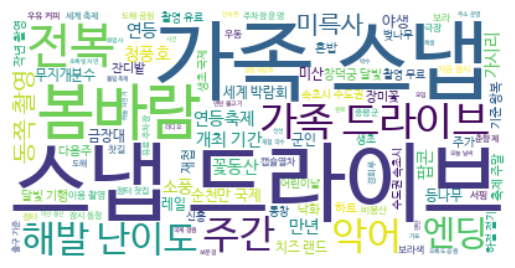

In [29]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[0])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
highlighted_words = ["물놀이","서핑","워터파크","루지","레저",]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

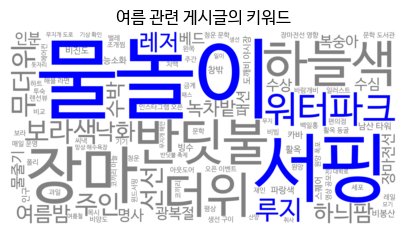

In [107]:
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(season_list[1])
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('여름 관련 게시글의 키워드')
plt.axis('off')
plt.show()

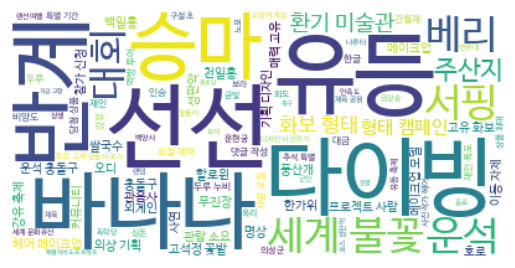

In [31]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[2])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

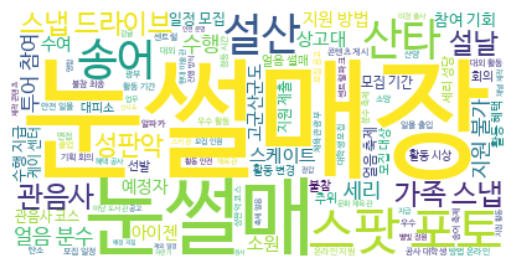

In [32]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[3])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## 지역별 키워드 분석
|지역|등장 키워드|관련 관광지|
|--|--|--|
경기|재인 폭포, 민속촌, 호로 고루, 별빛 정원, 연무대|자연 관광지, 문화 관광지|
강원|서핑, 썰매, 송어,승마|레저 스포츠|
경북|센트럴 파크,주산지,분황사,부석사|자연 관광지, 문화 관광지|
경남|통도사,운석 충돌구,비진도|자연 관광지, 문화 관광지|
충남|청산 수목원,세리 성당,얼음 분수 축제,랜드 목장,세계 박람회|자연 관광지, 문화 관광지|
충북|활옥 동굴,청풍호반, 비봉산|자연관광지|
부산|서핑,캡슐 열차,연등축제,야경 투어,산타 버스,오륙도 공원|축제, 레저 스포츠, 문화 관광지|
인천|승봉도,을왕리,선녀 바위,풀등,서풍받이|자연 관광지|
서울|세계 불꽃 축제,빛초롱 축제, 도깨비 야시장,창덕궁,월드 타워,무지개 분수|축제, 문화 관광지|
대전|스카이웨이,휴양림,형제 바위|자연 관광지|
대구|곱창 골목,치맥 페스티벌, 연탄 불고기|음식|
광주|지산 유원지, 사직 공원, 중외 공원|자연 관광지|
세종|옥상정원,산림 박물관, 수목원|자연 관광지|
전남|치즈 랜드, 고하도, 녹차밭,백양사|자연 관광지|
전북|반딧불,낙화,고군산 군도|자연 관광지|
제주|관음사, 성판악, 비양도|자연 관광지|
울산|대왕암 공원,간월재, 선바위, 자수정 동굴|자연 관광지|

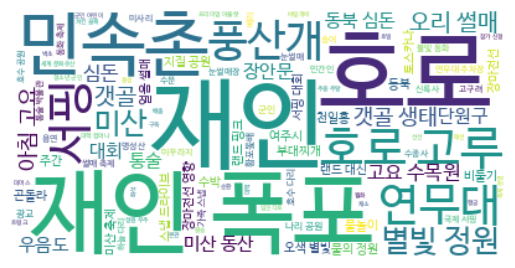

경기


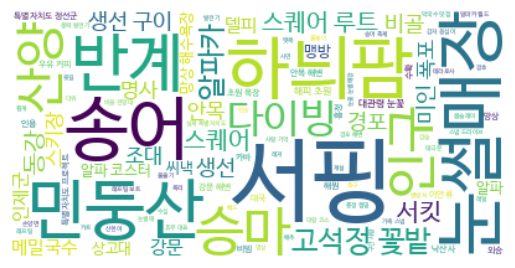

강원


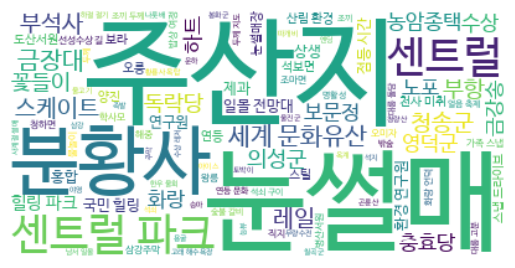

경북


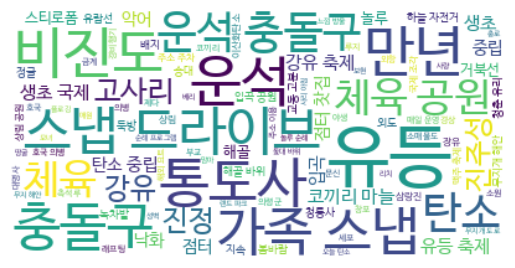

경남


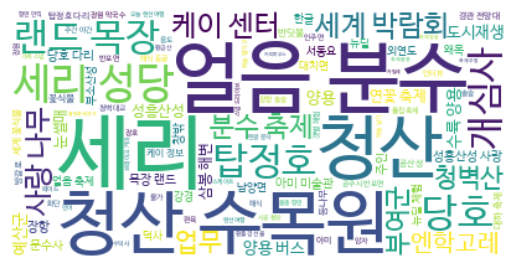

충남


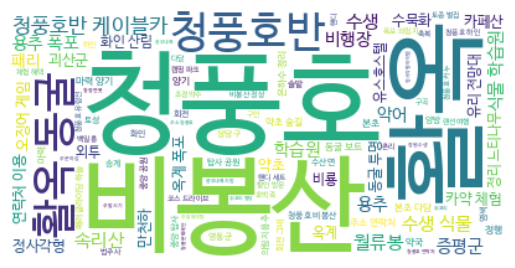

충북


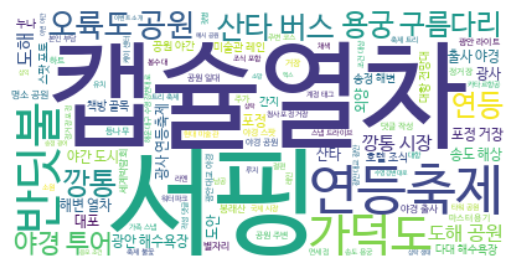

부산


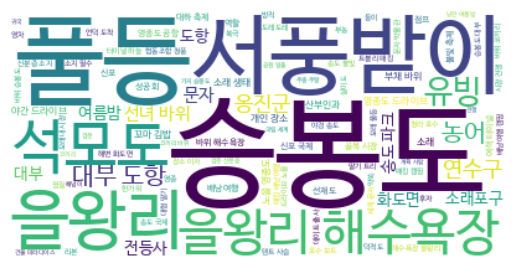

인천


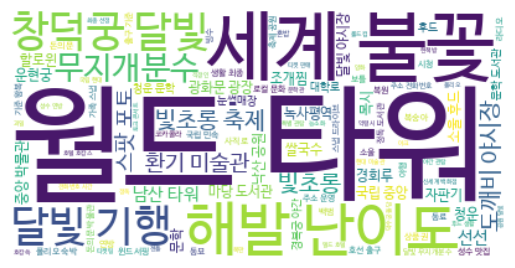

서울


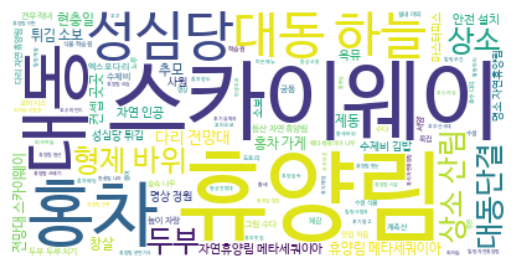

대전


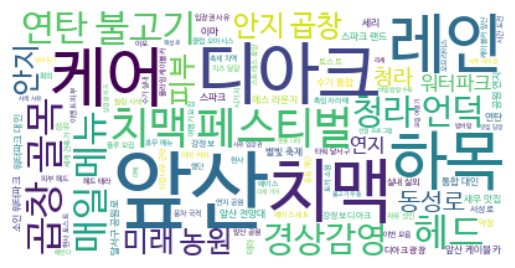

대구


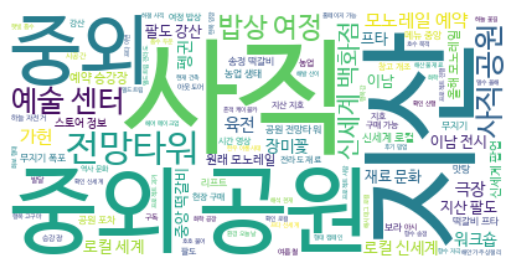

광주


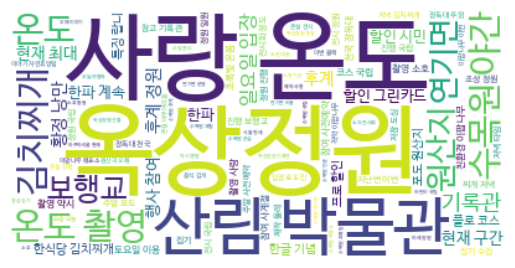

세종


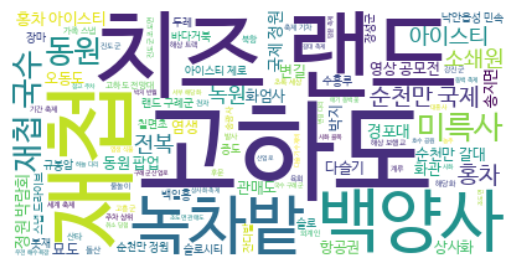

전남


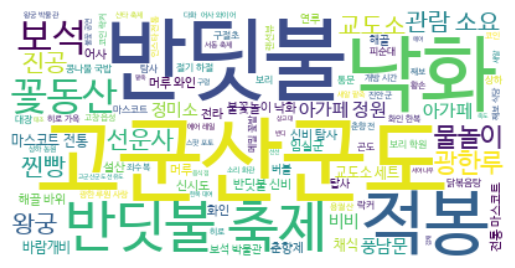

전북


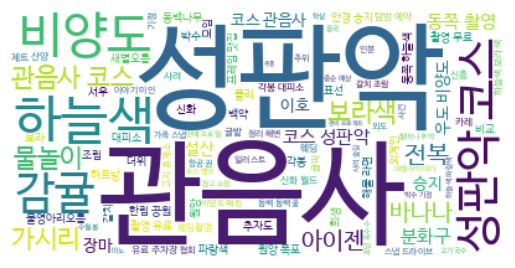

제주


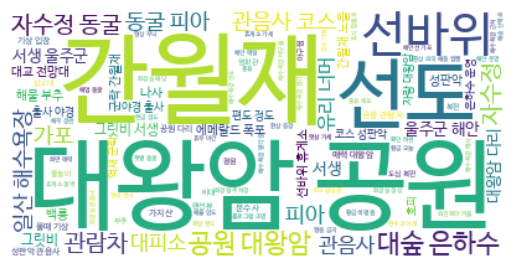

울산


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
for i in range(len(region_list)):
    wordCloud.generate_from_frequencies(region_list[i])
    wordCloud.words_
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print(region[i])

In [109]:
highlighted_words = ["눈썰매장","썰매","다이빙","승마","송어","서핑"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

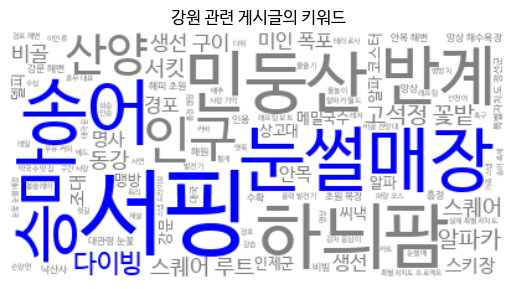

In [110]:
from wordcloud import WordCloud
wordCloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(region_list[1])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.title(region[1]+" 관련 게시글의 키워드")
plt.axis('off')
plt.show()

## 꽃과 관련된 키워드의 월별 빈도수
- 봄, 가을에 빈도 수 증가

In [34]:
 pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')

,flower_check
card_month,
1,40.0
10,136.0
11,110.0
12,47.0
2,52.0
3,188.0
4,188.0
5,76.0
6,64.0


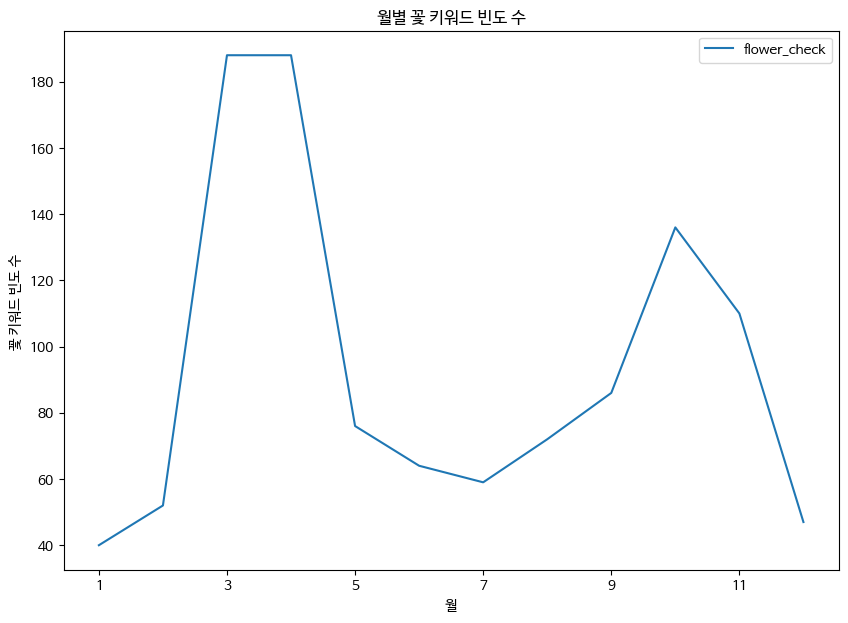

In [35]:
flower_count = pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')
flower_count = flower_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = flower_count.plot(kind='line', figsize=(10, 7))
plt.title('월별 꽃 키워드 빈도 수')
plt.xlabel('월')
plt.ylabel('꽃 키워드 빈도 수 ')

# 그래프 표시
plt.show()

## 축제와 관련된 키워드의 월별 빈도수
- 봄, 가을에 빈도 수 증가

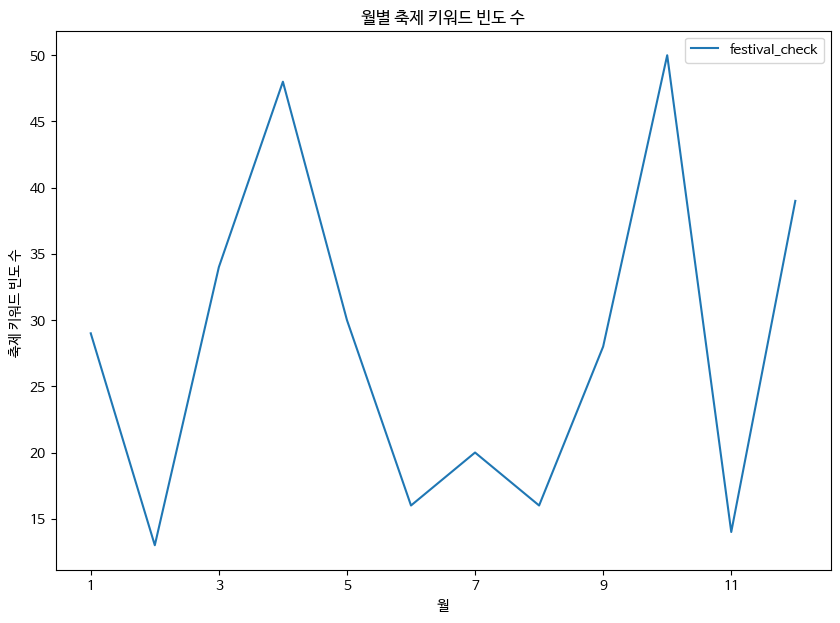

In [36]:
festival_count = pd.pivot_table(df_sns_title, index = "card_month",values="festival_check",aggfunc='sum')
festival_count = festival_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = festival_count.plot(kind='line', figsize=(10, 7))
plt.title('월별 축제 키워드 빈도 수')
plt.xlabel('월')
plt.ylabel('축제 키워드 빈도 수 ')

# 그래프 표시
plt.show()

# 결론
1. 계절
    - 봄, 가을의 경우 꽃이나 축제와 관련된 키워드가 많이 언급
    - 여름, 가을, 겨울에는 레저 스포츠와 관련된 키워드가 많이 언급

2. 지역
    - 대부분의 지역에서 자연 관광지와 관련된 키워드가 많이 언급
    - 서울의 경우 축제와 관련된 키워드가 많이 등장
    - 부산의 경우, 다양한 키워드가 등장
    - 대구의 경우, 음식과 관련된 키워드가 많이 등장
    - 강원의 경우 레저 스포츠와 관련된 키워드가 많이 등장